### Importación de datos



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Agregar columna para identificar la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar todos los DataFrames
datos_completos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Mostrar las primeras filas para verificar
print(datos_completos.head())
datos_completos.head()

            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [7]:
# Ingreso total por cada tienda
"""
En este primer análisis, debes calcular el ingreso total de cada tienda.
Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
"""
# Configuración de formato
pd.options.display.float_format = '{:,.0f}'.format

# Calcular el total de facturación para cada tienda

ingreso_tienda1= tienda1["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

# Organizo los ingresos de cada tienda en un DataFrame
ingresos = {
            'Tienda': ['Tienda1', 'Tienda2', 'Tienda3','Tienda4'],
            'Ingreso':[tienda1['Precio'].sum(),
                       tienda2['Precio'].sum(),
                       tienda3['Precio'].sum(),
                       tienda4['Precio'].sum()
                      ]
            }

df_ingresos = pd.DataFrame(ingresos)
df_ingresos


,Tienda,Ingreso
0,Tienda1,"1,150,880,400"
1,Tienda2,"1,116,343,500"
2,Tienda3,"1,098,019,600"
3,Tienda4,"1,038,375,700"


## Gráfico

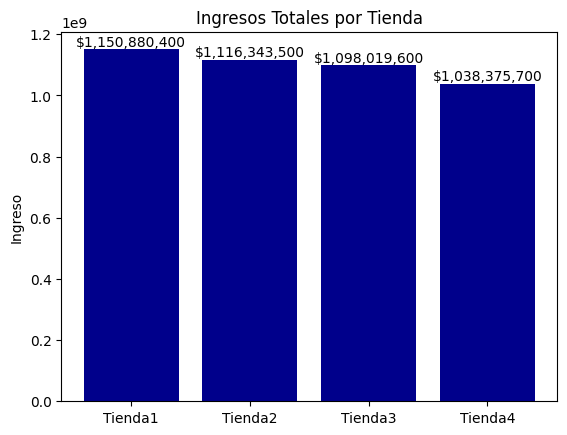

In [8]:
plt.figure()
barras = plt.bar(ingresos['Tienda'], ingresos['Ingreso'], color = 'darkblue')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Ingreso')

# Agregar etiquetas con los valores encima de cada barra
for barra in barras:
    altura = barra.get_height()
    texto = f"${altura:,.0f}"  # separador de miles y sin decimales
    plt.text(barra.get_x() + barra.get_width()/2, altura + 1, texto,
             ha='center', va='bottom')

plt.show()

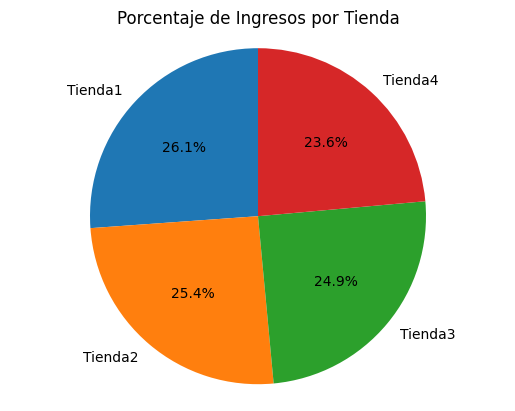

In [9]:
plt.pie(ingresos['Ingreso'], labels=ingresos['Tienda'], autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Ingresos por Tienda')
plt.axis("equal")  # Para que sea un círculo perfecto
plt.show()

# 2. Ventas por categoría

In [10]:
ventas_categoria = datos_completos.pivot_table(
    index="Categoría del Producto",
    columns="Tienda",
    values="Precio",
    aggfunc="count"
)

# Ordenar por total de ventas en todas las tiendas
ventas_categoria["Total"] = ventas_categoria.sum(axis=1) # Calcular el total por categoría (fila)
ventas_categoria = ventas_categoria.sort_values(by="Total", ascending=True) # Ordeno de menor a mayor por la columna Total
ventas_categoria = ventas_categoria.drop(columns="Total")   # quita la columna llamada "Total".

ventas_categoria.head(10)

Tienda,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,171,181,177,201
Libros,173,197,185,187
Instrumentos musicales,182,224,177,170
Deportes y diversión,284,275,277,277
Electrodomésticos,312,305,278,254
Juguetes,324,313,315,338
Electrónicos,448,422,451,451
Muebles,465,442,499,480


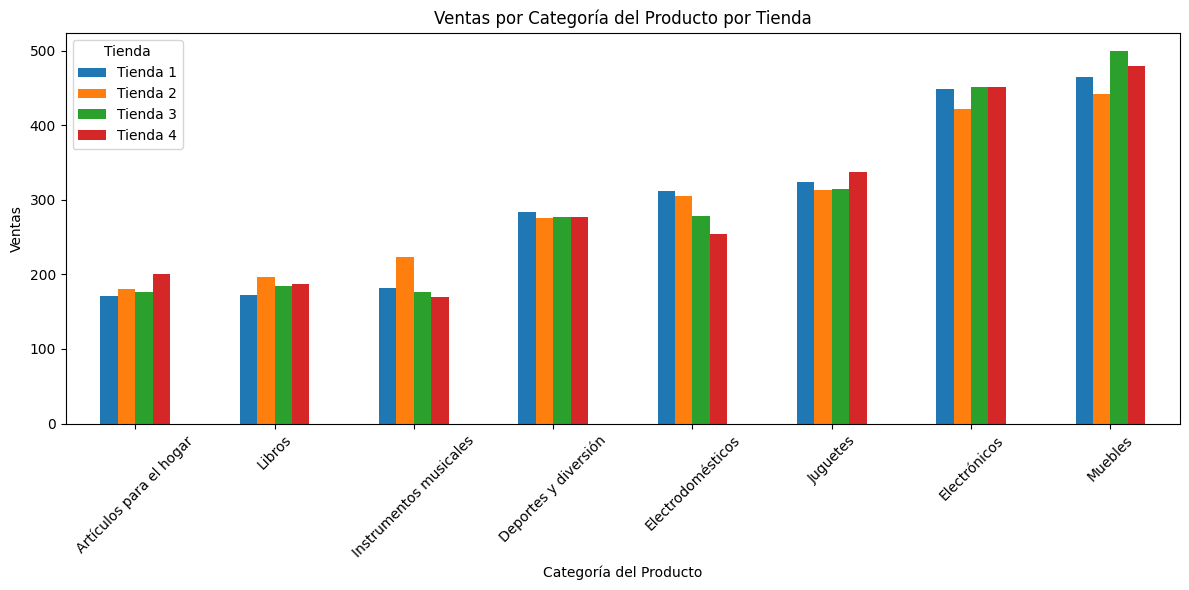

In [11]:
ventas_categoria.plot(kind="bar", figsize=(12, 6))
plt.title("Ventas por Categoría del Producto por Tienda")
plt.xlabel("Categoría del Producto")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [12]:
calificacion_promedio = datos_completos.groupby("Tienda")["Calificación"].mean().round(2).reset_index()
calificacion_promedio.columns = ["Tienda", "Calificación Promedio"]

calificacion_promedio

,Tienda,Calificación Promedio
0,Tienda 1,4
1,Tienda 2,4
2,Tienda 3,4
3,Tienda 4,4


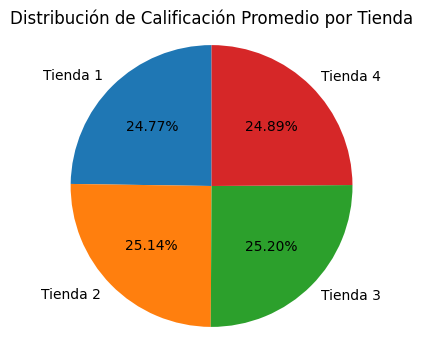

In [13]:
# Datos
labels = calificacion_promedio["Tienda"]
sizes = calificacion_promedio["Calificación Promedio"]

# Crear el gráfico
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct="%.2f%%", startangle=90)
plt.title("Distribución de Calificación Promedio por Tienda")
plt.axis("equal")  # Para que sea un círculo perfecto
plt.show()


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda